In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pylab as pl
from IPython import display
import time as ttime
import random
from mpl_toolkits.mplot3d import Axes3D

## Inverse discrete Fourier transform

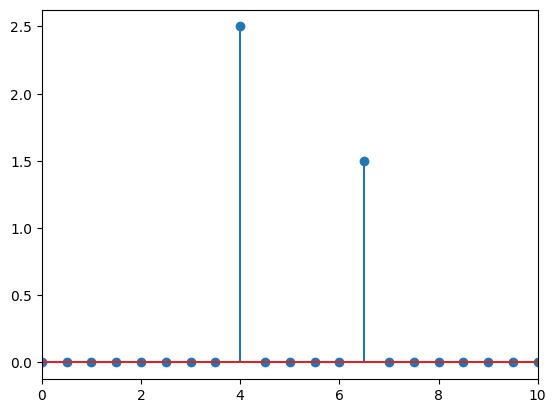

In [2]:
# Forward Fourier Transform

#create a signal
srate = 1000 
time = np.arange(0,2,1/srate)
pnts = len(time)
signal = 2.5*np.sin(2*np.pi*4*time) + 1.5 * np.sin(2*np.pi*6.5*time)

# Fourier Transform
fourTime = np.array(np.arange(0,pnts))/pnts
fCoefs = np.zeros(len(signal),dtype=complex)

for fi in range(0,pnts):
    csw = np.exp( -1j*2*np.pi*fi*fourTime)
    fCoefs[fi] = sum(np.multiply(csw,signal))

ampls = np.abs(fCoefs) /pnts
ampls[range(1,len(ampls))] = 2*ampls[range(1,len(ampls))]

hz = np.linspace(0,srate/2,int(np.floor(pnts/2)+1))
#we have more amplitude than frequency in hz
plt.stem(hz,ampls[range(0,len(hz))])
plt.xlim([0,10])
plt.show()

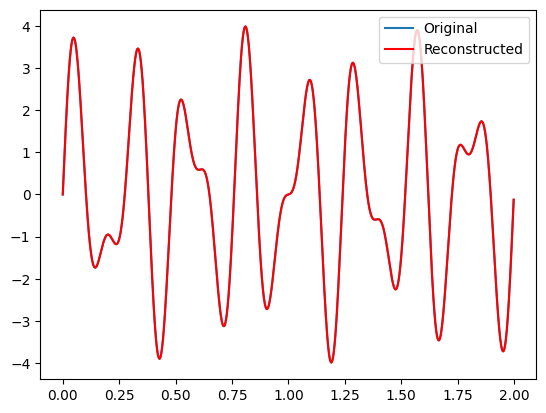

In [3]:
# Inverse Fourier Transform

# initialize time domain reconstruction
reconSignal = np.zeros(len(signal))

for fi in range(0,pnts):
  #create coefficient modulated complex sine wave
  csw = fCoefs[fi] * np.exp( 1j * 2*np.pi*fi*fourTime)
  #sum them together
  reconSignal = reconSignal + csw

# divide by N
reconSignal = reconSignal / pnts

plt.plot(time,signal,label='Original')
plt.plot(time,np.real(reconSignal),'r',label='Reconstructed')
plt.legend()
plt.show()

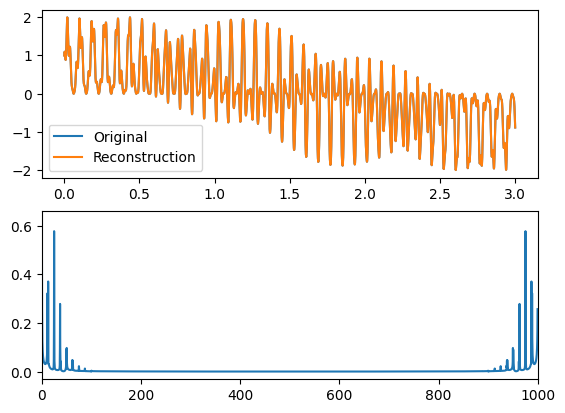

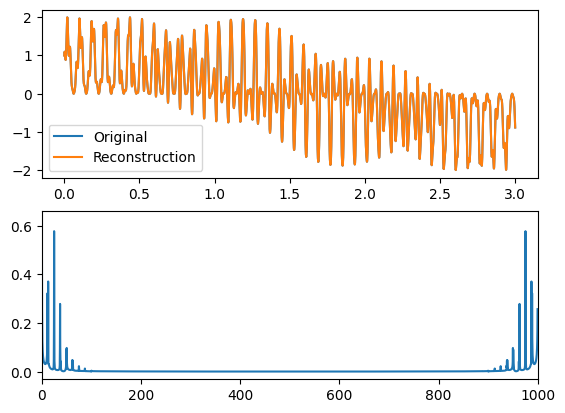

In [4]:
## Partial reconstruction of signal

# proportion of frequencies (from 0-srate) to reconstruct (.5 is Nyquist)
propfrex = .5

#set parameters
srate = 1000
time = np.arange(0,3,1/srate)
pnts = len(time)

# Create multispectrial signal 
signal = np.multiply((1+np.sin(2*np.pi*12*time)), np.cos(np.sin(2*np.pi*25*time)+time))

# Fourier Transform
fourTime = np.array(range(0,pnts))/pnts
fCoefs = np.zeros(len(signal),dtype=complex)

for fi in range(0,pnts):
  csw = np.exp(-1j * 2*np.pi*fi*fourTime)
  fCoefs[fi] = np.sum(np.multiply(csw,signal))/pnts

# frequency in hz
hz = np.linspace(0,srate,num=pnts) # up to srate for visualization

# IFT
reconSignal = np.zeros(len(signal),dtype=complex)

for fi in range(0,pnts):
  csw = fCoefs[fi] * np.exp(1j*2*np.pi*fi*fourTime)
  reconSignal = reconSignal + csw

  if fi<300 or fi>2700:
    pl.cla()
    plt.subplot2grid((2,1),(0,0))
    plt.plot(time,signal,label='Original')
    plt.plot(time,np.real(reconSignal), label='Reconstruction')
    plt.legend()

    plt.subplot2grid((2,1),(1,0))
    plt.plot(hz[0:fi], 2*np.abs(fCoefs[0:fi]))
    plt.xlim([0,hz[-1]])

    display.clear_output(wait=True)
    display.display(pl.gcf())
    ttime.sleep(.01)


## Inverse Fourier transform for signal processing

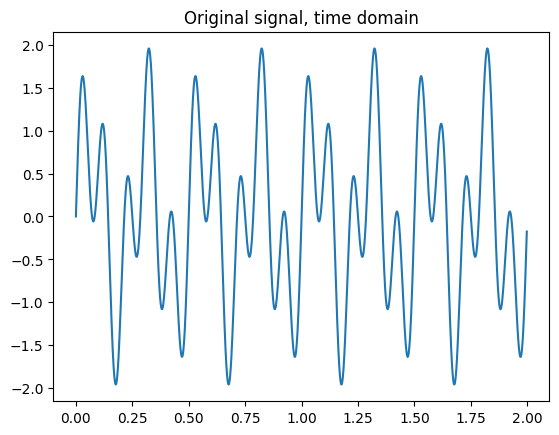

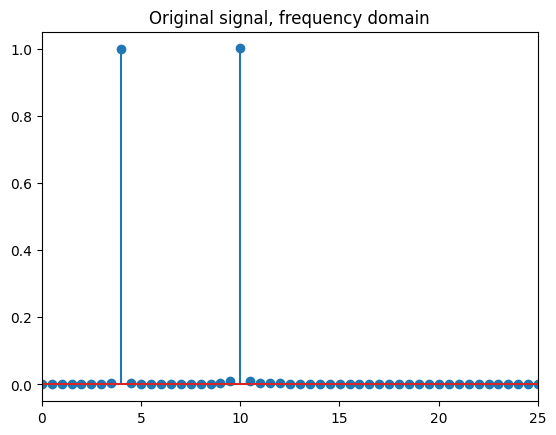

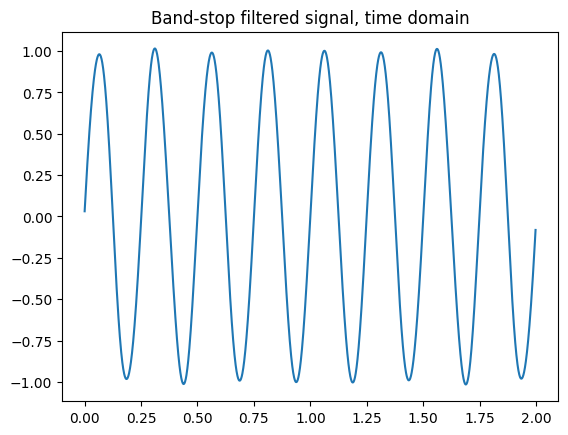

In [7]:
## bandpass filter

# simulation params
srate = 1000
time  = np.arange(0,2-1/srate,1/srate)
pnts  = len(time)

# signal 
signal = np.sin(2*np.pi*4*time) + np.sin(2*np.pi*10*time)

# Fourier transform
fourTime = np.array(np.arange(0,pnts))/pnts
fCoefs   = np.zeros(len(signal),dtype=complex)

for fi in range(0,pnts):
    
    # create complex sine wave
    csw = np.exp( -1j*2*np.pi*fi*fourTime )
    
    # compute dot product between sine wave and signal
    fCoefs[fi] = np.sum( np.multiply(signal,csw) )/pnts

# frequencies in Hz
hz = np.linspace(0,srate/2,int(np.floor(pnts/2.0)+1))

# find the coeff for 10 hz
freqidx = np.argmin(abs(hz-10))

#set that coeff to zero
fCoefsMod = list(fCoefs)
fCoefsMod[freqidx] = 0 # Positive freq
fCoefsMod[len(fCoefsMod)-freqidx] = 0 # Negative Frequency

# IFT
reconMod = np.zeros(len(signal),dtype=complex)
for fi in range(0,pnts):
    csw = fCoefsMod[fi] * np.exp( 1j*2*np.pi*fi*fourTime )
    reconMod = reconMod + csw


# now plot
plt.plot(time,signal)
plt.title('Original signal, time domain')
plt.show()

# plot original amplitude spectrum
plt.stem(hz,2*np.abs(fCoefs[0:len(hz)]))
plt.xlim([0,25])
plt.title('Original signal, frequency domain')
plt.show()

# and plot modulated time series
plt.plot(time,np.real(reconMod))
plt.title('Band-stop filtered signal, time domain')
plt.show()

In [8]:
len(fCoefsMod)

1999